<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Application Programming Interface

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

*   Create and Use APIs in Python


### Introduction

An API lets two pieces of software talk to each other. Just like a function,  you don’t have to know how the API works only its inputs and outputs.  An essential type of API is a REST API that allows you to access resources via the internet. In this lab, we will review the Pandas Library  in the context of an API, we will also review a basic REST API


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Pandas is an API</a></li>
<li><a href="#ref1">REST APIs Basics  </a></li>
<li><a href="#ref2">Quiz on Tuples</a></li>

</div>

<hr>


In [1]:
!pip install pycoingecko
!pip install plotly
!pip install mplfinance

     |████████████████████████████████| 71kB 23.0MB/s eta 0:00:01


<h2 id="PandasAPI">Pandas is an API </h2>


Pandas is actually set of software components , much of  which is not even written in Python.


In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import plot
import matplotlib.pyplot as plt
import datetime
from pycoingecko import CoinGeckoAPI
from mplfinance.original_flavor import candlestick2_ohlc

You create a dictionary, this is just data.


In [3]:
dict_={'a':[11,21,31],'b':[12,22,32]}

When you create a Pandas object with the Dataframe constructor in API lingo, this is an "instance". The data in the dictionary is passed along to the pandas API. You then use the dataframe to communicate with the API.


In [4]:
df=pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

<img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/pandas_api.png" width = 800, align = "center" alt="logistic regression block diagram" />


When you call the method head the dataframe communicates with the API displaying the first few rows of the dataframe.


In [5]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


When you call the method mean,the API will calculate the mean and return the value.


In [6]:
df.mean()

a    21.0
b    22.0
dtype: float64

<h2 id="ref1">REST APIs</h2>


Rest API’s function by sending a request,  the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or resource to perform. In a similar manner, API returns a response, via an HTTP message, this response is usually contained within a JSON.

In cryptocurrency a popular method to display the movements of the price of a currency.

![Example Candlestick Graph](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/candlestick.png)

Here is a description of the candle sticks.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/explanation.png" alt="Candle Stick Definition" width="800" height="600">

In this lab, we will be using the <a href=https://www.coingecko.com/en/api?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01>CoinGecko API</a> to create one of these candlestick graphs for Bitcoin. We will use the API to get the price data for 30 days with 24 observation per day, 1 per hour. We will find the max, min, open, and close price per day meaning we will have 30 candlesticks and use that to generate the candlestick graph. Although we are using the CoinGecko API we will use a Python client/wrapper for the API called <a href=https://github.com/man-c/pycoingecko?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01>PyCoinGecko</a>. PyCoinGecko will make performing the requests easy and it will deal with the enpoint targeting.


Lets start off by getting the data we need. Using the <code>get_coin_market_chart_by_id(id, vs_currency, days)</code>. <code>id</code> is the name of the coin you want, <code>vs_currency</code> is the currency you want the price in, and <code>days</code> is how many days back from today you want.


In [18]:
cg = CoinGeckoAPI()

bitcoin_data = cg.get_coin_market_chart_by_id(id='ethereum', vs_currency='myr', days=30)

In [19]:
type(bitcoin_data )

dict

The response we get is in the form of a JSON which includes the price, market caps, and total volumes along with timestamps for each observation. We are focused on the prices so we will select that data.


In [20]:
bitcoin_price_data = bitcoin_data['prices']

bitcoin_price_data[0:5]

[[1623862986861, 9841.305685843447],
 [1623866554671, 9970.020320852203],
 [1623870163466, 9954.85208955578],
 [1623873724721, 9984.751586134866],
 [1623877336134, 9921.417260033506]]

Finally lets turn this data into a Pandas DataFrame.


In [21]:
data = pd.DataFrame(bitcoin_price_data, columns=['TimeStamp', 'Price'])
data

,TimeStamp,Price
0,1623862986861,9841.305686
1,1623866554671,9970.020321
2,1623870163466,9954.852090
3,1623873724721,9984.751586
4,1623877336134,9921.417260
...,...,...
716,1626440457702,7930.507130
717,1626444077834,8014.970632
718,1626447652576,8043.718641
719,1626451257678,8141.738357


Now that we have the DataFrame we will convert the timestamp to datetime and save it as a column called <code>Date</code>. We will map our <code>unix_to_datetime</code> to each timestamp and convert it to a readable datetime.


In [22]:
data['date'] = data['TimeStamp'].apply(lambda d: datetime.date.fromtimestamp(d/1000.0))
data

,TimeStamp,Price,date
0,1623862986861,9841.305686,2021-06-16
1,1623866554671,9970.020321,2021-06-16
2,1623870163466,9954.852090,2021-06-16
3,1623873724721,9984.751586,2021-06-16
4,1623877336134,9921.417260,2021-06-16
...,...,...,...
716,1626440457702,7930.507130,2021-07-16
717,1626444077834,8014.970632,2021-07-16
718,1626447652576,8043.718641,2021-07-16
719,1626451257678,8141.738357,2021-07-16


Using this modified dataset we can now group by the <code>Date</code> and find the min, max, open, and close for the candlesticks.


In [23]:
candlestick_data = data.groupby(data.date, as_index=False).agg({"Price": ['min', 'max', 'first', 'last']})
candlestick_data

date        Price                                        
                        min           max        first         last
0   2021-06-16  9841.305686   9984.751586  9841.305686  9850.056075
1   2021-06-17  9638.379010  10153.381123  9741.481197  9723.422271
2   2021-06-18  8912.577608   9849.643014  9849.643014  9142.822334
3   2021-06-19  9047.363913   9350.929048  9228.103034  9083.951542
4   2021-06-20  8624.485036   9372.296716  9015.708992  9368.039906
5   2021-06-21  7785.306802   9316.868361  9316.868361  7785.306802
6   2021-06-22  7181.175727   8248.618973  7853.406813  7796.378348
7   2021-06-23  7778.046038   8490.824972  7778.046038  8130.911110
8   2021-06-24  7903.866995   8402.160503  8200.786421  8257.153393
9   2021-06-25  7531.471368   8383.449853  8278.566072  7558.861709
10  2021-06-26  7140.373229   7653.771995  7602.115606  7463.402131
11  2021-06-27  7551.650098   8168.039293  7551.650098  8168.039293
12  2021-06-28  8186.220920   8862.700903  8203.640050  8714.378131
13  2021-06-29  8654.852629   9255.902035  8654.852629  9112.511946
14  2021-06-30  8737.981207   9410.593410  9007.349082  9347.599010
15  2021-07-01  8680.699655   9462.738801  9462.738801  8883.475481
16  2021-07-02  8459.268417   8939.861163  8823.975209  8939.861163
17  2021-07-03  8864.077619   9315.318921  8984.335815  9199.510456
18  2021-07-04  9177.565454   9954.407236  9297.909405  9749.599339
19  2021-07-05  9082.119837   9696.811281  9696.811281  9315.833733
20  2021-07-06  9190.320963   9751.885528  9190.320963  9636.585097
21  2021-07-07  9601.213059   9976.079321  9655.369631  9697.695297
22  2021-07-08  8784.874132   9648.233910  9648.233910  8784.874132
23  2021-07-09  8665.735392   9133.566269  8891.719177  9075.991091
24  2021-07-10  8776.774201   9160.972807  9037.152500  8888.368667
25  2021-07-11  8773.049096   9122.106754  8887.865161  9040.624382
26  2021-07-12  8457.010331   9109.651730  8983.761272  8561.304915
27  2021-07-13  8092.327629   8558.771924  8558.771924  8132.512101
28  2021-07-14  7916.433264   8459.624811  8149.518688  8459.624811
29  2021-07-15  7985.438607   8463.813302  8391.184749  8103.774831
30  2021-07-16  7833.400321   8205.495031  8018.994016  8132.072572

Finally we are now ready to use plotly to create our Candlestick Chart.


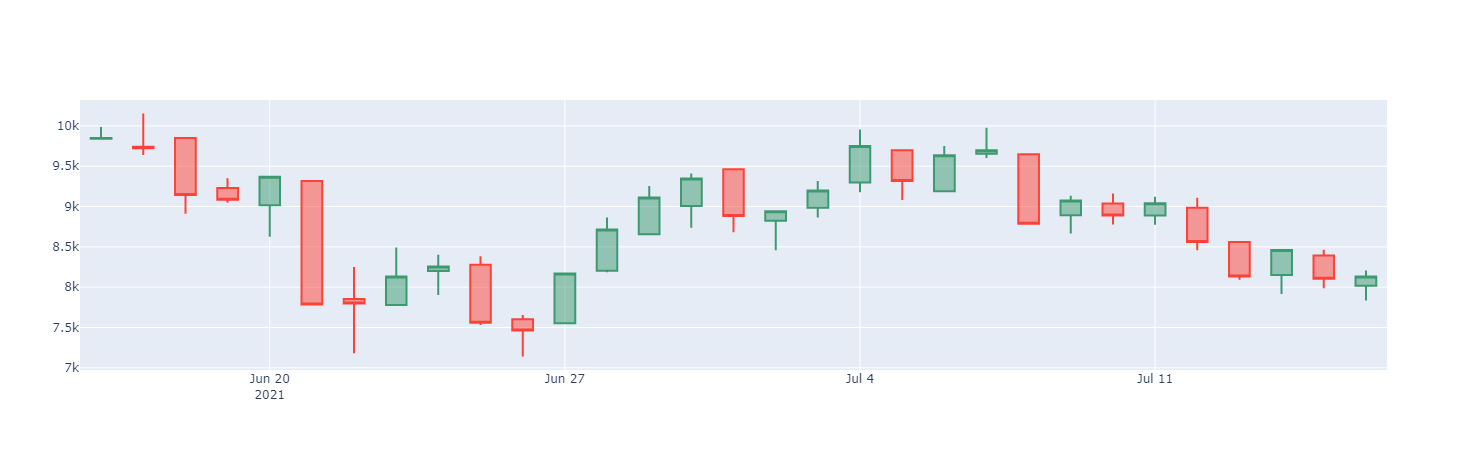

In [25]:
fig = go.Figure(data=[go.Candlestick(x=candlestick_data['date'],
                open=candlestick_data['Price']['first'], 
                high=candlestick_data['Price']['max'],
                low=candlestick_data['Price']['min'], 
                close=candlestick_data['Price']['last'])
                ])

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

## Authors:

## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-11-23 | 3.0 | Azim Hirjani | New API |
| 2020-09-09 | 2.1 | Malika Singla | Spell Check |
| 2020-08-26  | 2.0  | Lavanya | Moved lab to course repo in GitLab |
|   |   |   |   |

<hr/>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
